# Mapping Protein-Protein Interactions
Robin Anwyl

In this notebook, we will map protein-protein interaction (PPI) networks from the STRING database.

In [15]:
import ipywidgets as widgets
from IPython.display import display
import requests
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)


class PPINetwork:
    """
    A class that represents a protein-protein interaction network from the
    STRING database.
    """
    def __init__(self, networkId):
        """
        Initializes class attributes.
        :param str networkId: STRING network ID for PPI network
        """
        self.graph = nx.Graph()
        url = "https://string-db.org/api/tsv/network?networkId=" + networkId
        file = requests.get(url).text
        lines = file.split("\n")
        data = [l.split("\t") for l in lines]
        self.df = pd.DataFrame(data[1:-1], columns=data[0])

    def construct_graph(self, scores_to_include, confidence):
        """
        To do: add docstring
        """
        # Add edges between proteins with edge weights = scores
        for index, row in self.df.iterrows():
            protein1 = row["preferredName_A"]
            protein2 = row["preferredName_B"]
            nscore = row["nscore"] # gene neighborhood score
            fscore = row["fscore"] # gene fusion score
            pscore = row["pscore"] # phylogenetic profile score
            ascore = row["ascore"] # coexpression score
            escore = row["escore"] # experimental score
            dscore = row["dscore"] # database score
            tscore = row["tscore"] # textmining score
            cscore = row["score"] # Combined score (all the above scores)
            score_types = ["nscore", "fscore", "pscore", "ascore", "escore", "dscore", "tscore"]
            final_score = 0
            # If all scores included
            if set(scores_to_include) == set(score_types):
                final_score = float(cscore)
            # If only some scores included
            else:
                final_score = sum([locals()[score_name] for score_name in scores_to_include if score_name in locals()])
            # Add edge if minimum required interaction score is met
            if final_score >= confidence:
                self.graph.add_edge(protein1, protein2, weight=final_score)

    def cluster(self):
        pass

    def visualize(self, title):
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=500)
        plt.title(title)
        plt.show()

In the main() function, we will map two protein-protein interaction networks. The first is the PPI network for FAA4, a long chain fatty acyl-CoA synthetase, in yeast *(Saccharomyces cerevisiae)*. The second is the PPI network for a poorly characterized protein in *Natronococcus occultus*. We will take user input for the following:
- What types of evidence to use for predicting associations, e.g. database, experimental, etc.
- Minimum required interaction score, i.e. confidence score threshold
- Clustering option and its parameters

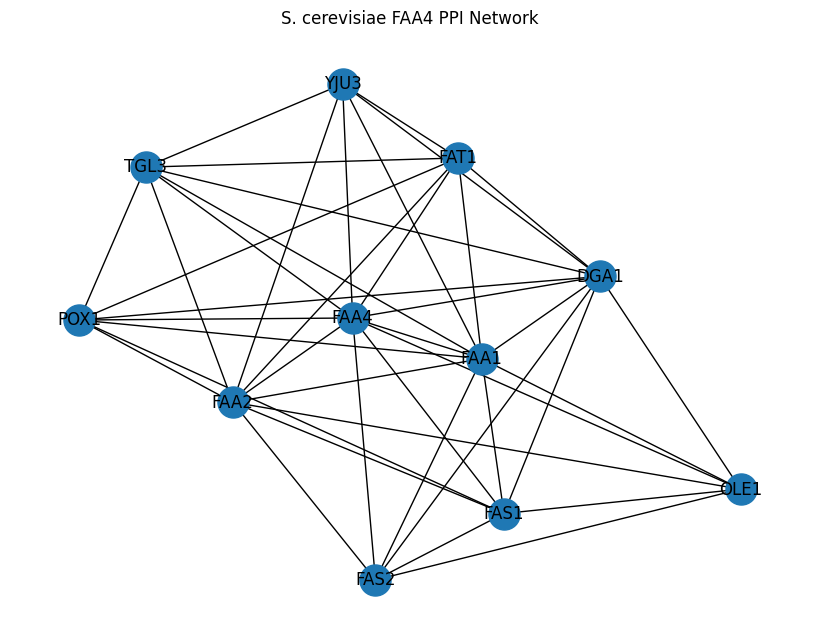

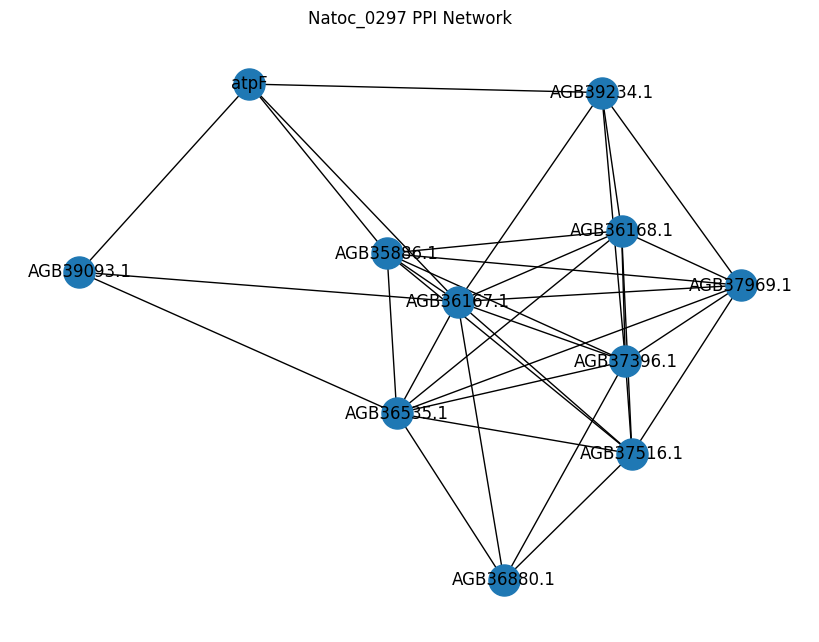

In [16]:
def main():
    ppi_faa4 = PPINetwork("bzZuIbI0NG4C")
    ppi_faa4.construct_graph(["nscore", "fscore", "pscore", "ascore", "escore", "dscore", "tscore"], 0.7)
    ppi_faa4.visualize("S. cerevisiae FAA4 PPI Network")
    ppi_natoc = PPINetwork("bW6mAvvYPFTF")
    ppi_natoc.construct_graph(["nscore", "fscore", "pscore", "ascore", "escore", "dscore", "tscore"], 0.7)
    ppi_natoc.visualize("Natoc_0297 PPI Network")

if __name__=="__main__":
    main()